# Sensitivity Analysis - Impervious Surface 

We will plot the runoff data across 2014 while changing the impervious percentage of the surface by +-10%.

**No Green Infrastructure**

### Imports

In [1]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import calendar
from swmmtoolbox import swmmtoolbox

### Selecting the Output Files

In [2]:
chicago_output = glob.glob('./chicago/sensitivity_analysis/*.out')
california_output = glob.glob('./california/sensitivity_analysis/*.out')
print(len(chicago_output), len(california_output))

3 3


### Extracting the Runoff Data for Chicago, California (0%, +10%, -10%)

In [3]:
for file in chicago_output:
    if 'increase' in file:
        print('increase') # +10%
        chicago_increase_runoff = swmmtoolbox.extract(file, 'system,Runoff,Runoff')
    elif 'decrease' in file:
        print('decrease') # -10%
        chicago_decrease_runoff = swmmtoolbox.extract(file, 'system,Runoff,Runoff')
    else:
        print('no_change')
        chicago_std_runoff = swmmtoolbox.extract(file, 'system,Runoff,Runoff')
        
for file in california_output:
    if 'increase' in file:
        print('increase')
        california_increase_runoff = swmmtoolbox.extract(file, 'system,Runoff,Runoff')
    elif 'decrease' in file:
        print('decrease')
        california_decrease_runoff = swmmtoolbox.extract(file, 'system,Runoff,Runoff')       
    else:
        print('no_change')
        california_std_runoff = swmmtoolbox.extract(file, 'system,Runoff,Runoff')


no_change


/home/matas/anaconda3/envs/swmm/lib/python3.7/site-packages/swmmtoolbox/swmmtoolbox.py:800: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  result = pd.concat(jtsd, axis=1, join_axes=[jtsd[0].index])


increase
decrease
no_change
decrease
increase


#### Plot X-Axis

In [11]:
date = [i for i in range(365)]

### Converting the Data to Daily Timeseries and Dividing by Subcatchment Area

In [12]:
chicago_std_d = chicago_std_runoff.resample('d').sum()
chicago_increase_d = chicago_increase_runoff.resample('d').sum()
chicago_decrease_d = chicago_decrease_runoff.resample('d').sum()

chicago_std_corrected = chicago_std_d['system__Runoff'].apply(lambda x: x / 4933.82198249943)
chicago_increase_corrected = chicago_increase_d['system__Runoff'].apply(lambda x: x / 4933.82198249943)
chicago_decrease_corrected = chicago_decrease_d['system__Runoff'].apply(lambda x: x / 4933.82198249943)

## Chicago Plot

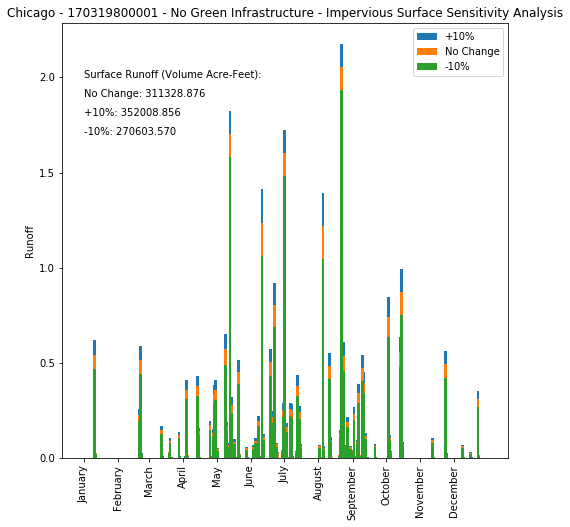

In [18]:
plt.figure(figsize=(8,8))

plt.title('Chicago - 170319800001 - No Green Infrastructure - Impervious Surface Sensitivity Analysis')
width = 2.5
plt.bar(date, chicago_increase_corrected.iloc[-365:], width, label='+10%')
plt.bar(date, chicago_std_corrected.iloc[-365:], width, label='No Change')
plt.bar(date, chicago_decrease_corrected.iloc[-365:], width, label='-10%')
plt.legend()
plt.ylabel('Runoff')
plt.xticks([0,31,59,90,120,151,181,212,243,273,304,334], calendar.month_name[1:13], rotation=90)
plt.text(0,2.0,'Surface Runoff (Volume Acre-Feet):')
plt.text(0,1.9, 'No Change: 311328.876')
plt.text(0,1.8, '+10%: 352008.856')
plt.text(0,1.7, '-10%: 270603.570')


plt.savefig('./runoff_chicago_sensititvity_analysis.svg', dpi=900)

## California Plot

In [19]:
california_std_d = california_std_runoff.resample('d').sum()
california_increase_d = california_increase_runoff.resample('d').sum()
california_decrease_d = california_decrease_runoff.resample('d').sum()

california_std_corrected = california_std_d['system__Runoff'].apply(lambda x: x / 67.3855335000138)
california_increase_corrected = california_increase_d['system__Runoff'].apply(lambda x: x / 67.3855335000138)
california_decrease_corrected = california_decrease_d['system__Runoff'].apply(lambda x: x / 67.3855335000138)

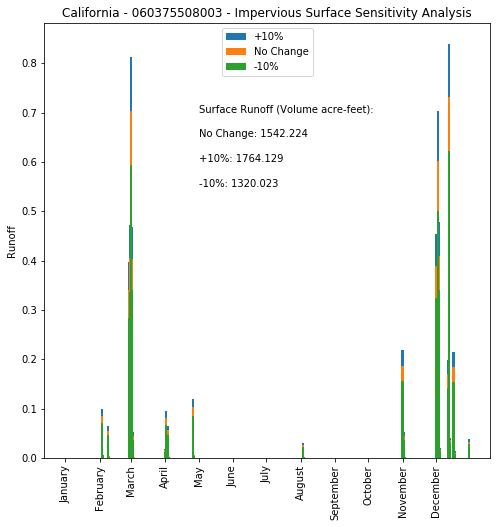

In [27]:
plt.figure(figsize=(8,8))
plt.title('California - 060375508003 - Impervious Surface Sensitivity Analysis')

width = 2.0
plt.bar(date, california_increase_corrected.iloc[-365:], width, label='+10%')
plt.bar(date, california_std_corrected.iloc[-365:], width, label='No Change')
plt.bar(date, california_decrease_corrected.iloc[-365:], width, label='-10%')
plt.legend()
plt.ylabel('Runoff')
plt.xticks([0,31,59,90,120,151,181,212,243,273,304,334], calendar.month_name[1:13], rotation=90)
plt.text(120, 0.7,'Surface Runoff (Volume acre-feet):')
plt.text(120, 0.65, 'No Change: 1542.224')
plt.text(120, 0.6, '+10%: 1764.129')
plt.text(120, 0.55, '-10%: 1320.023')

plt.savefig('./runoff_california_sensititvity_analysis.svg', dpi=900)